In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = (8,6)
# pp = PdfPages('multipage.pdf')

In [2]:
df = pd.read_csv('tesi.csv')
df.head()

,Temp,h,Cv,deltaCv,M,deltaM,Chi,deltaChi
0,1.1,0,0.430106,0.818449,0.860931,0.000069,0.030158,0.008684
1,1.2,0,0.698049,0.483802,0.850382,0.000081,0.044635,0.014623
2,1.3,0,0.433614,0.612932,0.829837,0.000359,0.035228,0.070456
3,1.4,0,0.783779,0.168421,0.801798,0.000218,0.075058,0.035449
4,1.5,0,0.904593,0.209099,0.783494,0.000117,0.096111,0.025160


# $C_v$

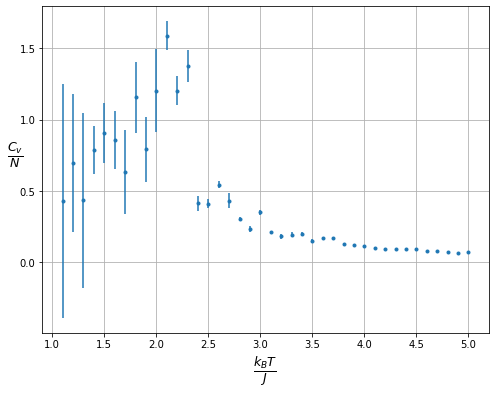

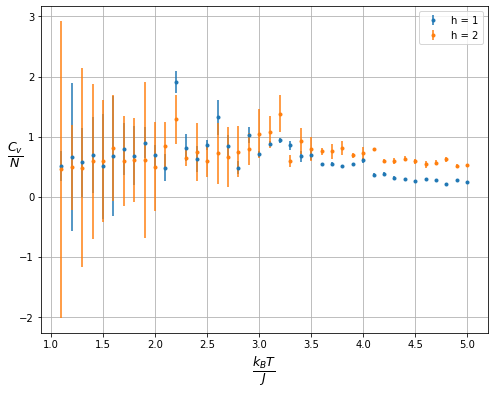

In [3]:
for h in set(df.h):
    dfh = df[df.h == h]
    plt.errorbar(dfh.Temp, dfh.Cv, fmt='.', yerr=dfh.deltaCv, label=f'h = {h}')
    plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=18)
    plt.ylabel('$\\frac{C_v}{N}$', fontsize=18, rotation='horizontal')
    if h == 0 or h == 2:
        if h == 2: plt.legend()
        plt.grid()
#         pp.savefig()
        plt.show()

# M

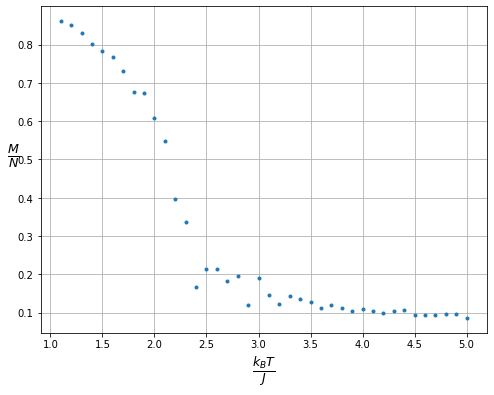

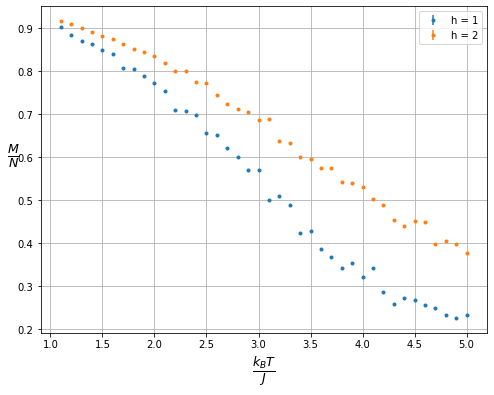

In [4]:
for h in set(df.h):
    dfh = df[df.h == h]
    plt.errorbar(dfh.Temp, dfh.M, fmt='.', yerr=dfh.deltaM, label=f'h = {h}')
    plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=18)
    plt.ylabel('$\\frac{M}{N}$', fontsize=18, rotation='horizontal')
    if h == 0 or h == 2:
        if h == 2: plt.legend()
        plt.grid()
#         pp.savefig()
        plt.show()

# $\chi$

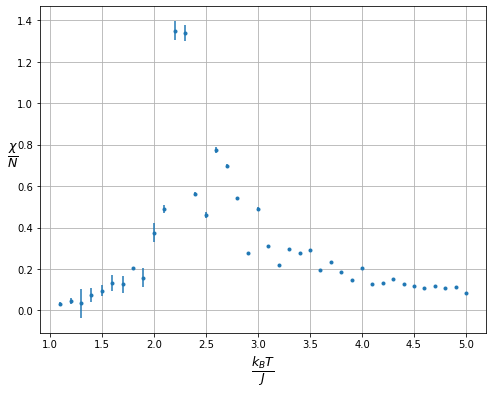

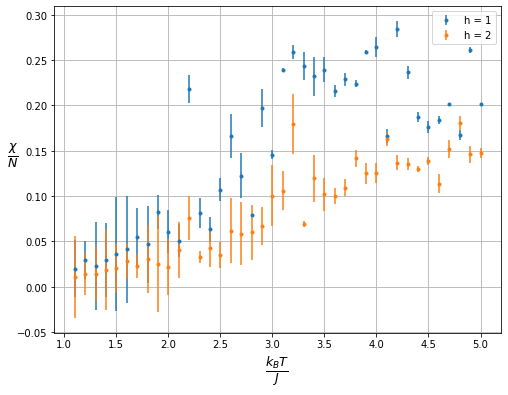

In [5]:
for h in set(df.h):
    dfh = df[df.h == h]
    plt.errorbar(dfh.Temp, dfh.Chi, fmt='.', yerr=dfh.deltaChi, label=f'h = {h}')
    plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=18)
    plt.ylabel('$\\frac{\chi}{N}$', fontsize=18, rotation='horizontal')
    if h == 0 or h == 2:
        if h == 2: plt.legend()
        plt.grid()
#         pp.savefig()
        plt.show()

In [6]:
# pp.close()